In [1]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm 
import zipfile

In [2]:
input = './Medical_Report.pdf'
with open(input, 'rb') as file:
        binary_data = file.read()
        binary_string = ''.join(format(byte, '08b') for byte in binary_data)

In [3]:
print(len(binary_string))

2037968


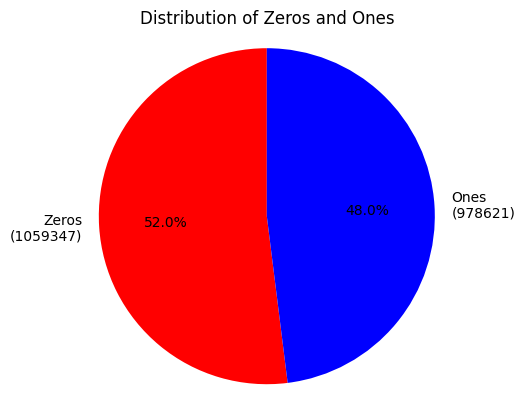

In [4]:
zeros = binary_string.count('0')
ones = binary_string.count('1')

labels = [f'Zeros\n({zeros})', f'Ones\n({ones})']
sizes = [zeros, ones]
colors = ['red', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Zeros and Ones')
plt.show()


In [5]:
width, height = 3840, 2160
if (len(binary_string)/(width * height)) % 1 == 0:
    num_images = (len(binary_string) // (width * height))
    
else :
    num_images = (len(binary_string) // (width * height)) + 1

total_chars_required= num_images * width * height
padded_binary_string = binary_string.ljust(total_chars_required, '0')
zeros_added = len(padded_binary_string)- len(binary_string)

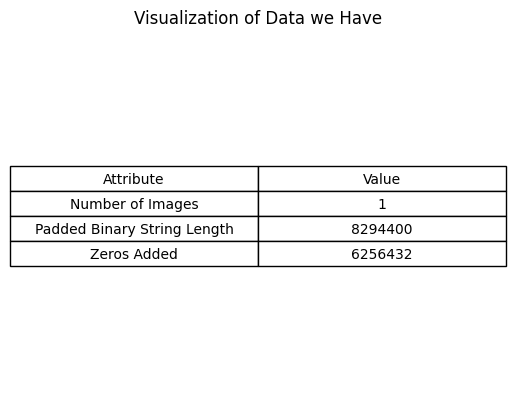

In [6]:
data = [['Number of Images', num_images],
        ['Padded Binary String Length', len(padded_binary_string)],
        ['Zeros Added', zeros_added]]

fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center', cellLoc='center', colLabels=['Attribute', 'Value'])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  

ax.axis('off')  
plt.title('Visualization of Data we Have')
plt.show()


In [7]:
folder = 'images'

if os.path.exists(folder):
    shutil.rmtree(folder)
os.makedirs(folder)

In [8]:
color_0 = (255, 255, 255)  # White
color_1 = (0, 0, 0)        # Black

for i in tqdm(range(num_images), desc="Converting", unit="image"):
    start_idx = i * width * height
    end_idx = (i + 1) * width * height
    segment = padded_binary_string[start_idx:end_idx]

    binary_array = np.array(list(map(int, segment))).reshape((height, width))

    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    rgb_image[binary_array == 0] = color_0
    rgb_image[binary_array == 1] = color_1

    image_filename = os.path.join(folder, f'image_{i + 1}.png')

    pil_image = Image.fromarray(rgb_image)
    pil_image.save(image_filename)

Converting: 100%|██████████| 1/1 [00:01<00:00,  1.41s/image]


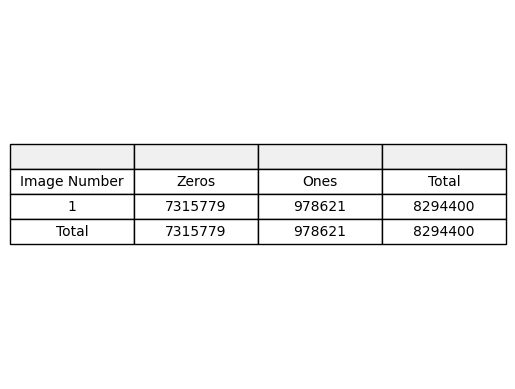

In [9]:
zeros_per_image = [segment.count('0') for segment in [padded_binary_string[i:i + width * height] for i in range(0, len(padded_binary_string), width * height)]]
ones_per_image = [segment.count('1') for segment in [padded_binary_string[i:i + width * height] for i in range(0, len(padded_binary_string), width * height)]]

data = [['Image Number', 'Zeros', 'Ones', 'Total'],
        *[[i+1, zeros, ones, zeros + ones] for i, (zeros, ones) in enumerate(zip(zeros_per_image, ones_per_image))],
        ['Total', sum(zeros_per_image), sum(ones_per_image), sum(zeros_per_image) + sum(ones_per_image)]]

fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center', cellLoc='center', colLabels=None, colColours=['#f0f0f0']*4)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5) 

ax.axis('off')  
plt.show()


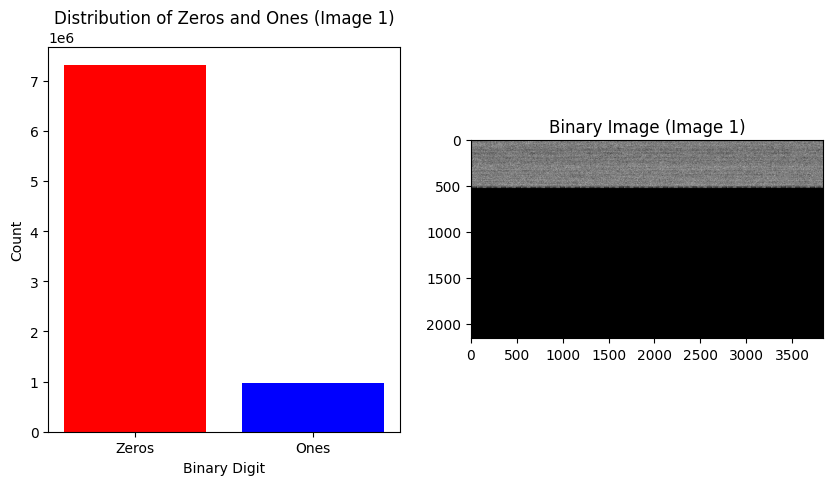

In [10]:
for i in range(num_images):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(['Zeros', 'Ones'], [zeros_per_image[i], ones_per_image[i]], color=['red', 'blue'])
    plt.title(f'Distribution of Zeros and Ones (Image {i+1})')
    plt.xlabel('Binary Digit')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    start_idx = i * width * height
    end_idx = (i + 1) * width * height
    segment = padded_binary_string[start_idx:end_idx]

    binary_array = np.array(list(map(int, segment))).reshape((height, width))

    plt.imshow(binary_array, cmap='gray')
    plt.title(f'Binary Image (Image {i+1})')

    plt.show()

In [11]:
shutil.make_archive('images_archive', 'zip', 'images')
print("Images folder has been zipped successfully!")

zip_file_path = os.path.join(os.getcwd(), 'images_archive.zip')
print(f"Zip file location: {zip_file_path}")

Images folder has been zipped successfully!
Zip file location: /Users/lovecoder/Desktop/Binary Based encoding/Final Dev/images_archive.zip
